In [1]:
print("hello")

hello


In [2]:
import sys
print(sys.version)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


In [3]:
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import TextVectorization, Embedding, Layer

import tensorflow_hub as hub

from tensorflow.keras import utils
from tensorflow.data import Dataset

from tensorflow import string, float32
from tensorflow import constant, convert_to_tensor

import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups

In [4]:
categories = ['alt.atheism', 'comp.graphics']
train_dataset = fetch_20newsgroups(subset='train', categories = categories, remove=('headers', 'footers', 'quotes'), random_state=0)
train_X, train_Y = (train_dataset.data, train_dataset.target)

newsgroup_names = train_dataset.target_names

print('Total documents in subset of Newsgroups corpus: ', len(train_X))
print('\nAn example document from category:', newsgroup_names[train_Y[0]])
print(train_X[0])

Total documents in subset of Newsgroups corpus:  1064

An example document from category: comp.graphics
Hi !

If you want to have Soft-Scrolling on your VGA, you have to change some 
intern registers of the CRTC. But it is a little bit difficult to explain, 
so I would suggest, you take a look at "The Programming of the 
EGA/VGA-Adapter" by Addison-Wesley. You will find all useful descriptions 
for every available VGA-Register.

-Boris



In [5]:
toy_corpus = ['[be yourself, trust Yourself, accept yourSelf]', '[be positive, be good]']

toy_vectorize_layer = TextVectorization(output_sequence_length=8, max_tokens=8)
toy_vectorize_layer.adapt(Dataset.from_tensor_slices(toy_corpus))
toy_vectorized_corpus = toy_vectorize_layer(convert_to_tensor(toy_corpus, dtype=string))

print("Dictionary: ", toy_vectorize_layer.get_vocabulary())
print("Vectorized Words: ", toy_vectorized_corpus)

Dictionary:  ['', '[UNK]', 'yourself', 'be', 'trust', 'positive', 'good', 'accept']
Vectorized Words:  tf.Tensor(
[[3 2 4 2 7 2 0 0]
 [3 5 3 6 0 0 0 0]], shape=(2, 8), dtype=int64)


In [6]:
docs_output_seq_len = 250
docs_vectorize_layer = TextVectorization(output_sequence_length=docs_output_seq_len, max_tokens=20000)
docs_vectorize_layer.adapt(Dataset.from_tensor_slices(train_X))

docs_vectorized_corpus = docs_vectorize_layer(convert_to_tensor(train_X, dtype=string))
docs_vocab_size = len(docs_vectorize_layer.get_vocabulary())

print("Dictionary size of Newsgroup corpus: ", docs_vocab_size)
print("\nDocument text version: ", train_X[3])
print("\nDocument vectorized version: ", docs_vectorized_corpus[3])

Dictionary size of Newsgroup corpus:  17928

Document text version:  Hi !!! This is the response for Wayne Michael...and certainly for other-one :-)


I'm sorry for...

    1)  The late of the answer but I couldn't find xv221 for msdos 'cause 
	I forgot the address...but I've retrieve it..

    2)  Posting this answer here in comp.graphics 'cause I can't use e-mail,
	not yet....

   2) My bad english 'cause I'm a Swiss and my language is french....


After a long time I retrieve the address where you can find XV for Dos...

	Site	: omnigate.clarkson.edu
	Aliases	: grape.ecs.clarkson.edu
	Number	: 128.153.4.2

	/pub/msdos/djgpp/pub

	it's xv221.zip (?) I think...


Certainly you read the other answer from Kevin Martin... He write about DV/X 
(?). 

    What is it ?????? Could Someone answer ????
	
	Thanx in advance.... 

-- 
---------------------------------------------------------------------
*								    *
*  Pascal PERRET     		|	perret@eicn.etna.ch         *
*  Ecole d'ingénieur ETS

In [9]:
print("Dictionary: ", toy_vectorize_layer.get_vocabulary())
output_mode = ['multi_hot', 'count', 'tf_idf']
method = ['Bag of words (binary)', 'Bag of words (count)', 'TF-IDF']
toy_statistic = [0,0,0]

for i, mode, m in zip([0,1,2], output_mode, method):
  toy_vectorize_layer = TextVectorization(output_mode=mode)
  toy_vectorize_layer.adapt(Dataset.from_tensor_slices(toy_corpus))
  toy_statistic[i] = toy_vectorize_layer(convert_to_tensor(toy_corpus, dtype=string))
  print('Method:',m)
  print(toy_statistic[i].numpy(), '\n')

print('Method: TF')
print(toy_statistic[1].numpy() / np.sum(toy_statistic[1].numpy(), axis=1)[:,None])

Dictionary:  ['[UNK]', 'yourself', 'be', 'trust', 'positive', 'good', 'accept']
Method: Bag of words (binary)
[[0. 1. 1. 1. 0. 0. 1.]
 [0. 0. 1. 0. 1. 1. 0.]] 

Method: Bag of words (count)
[[0. 3. 1. 1. 0. 0. 1.]
 [0. 0. 2. 0. 1. 1. 0.]] 



Method: TF-IDF
[[0.         2.0794415  0.51082563 0.6931472  0.         0.
  0.6931472 ]
 [0.         0.         1.0216513  0.         0.6931472  0.6931472
  0.        ]] 

Method: TF
[[0.         0.5        0.16666667 0.16666667 0.         0.
  0.16666667]
 [0.         0.         0.5        0.         0.25       0.25
  0.        ]]


In [10]:
toy_embedding_layer = Embedding(input_dim=10, output_dim=4)
toy_embedded_words = toy_embedding_layer(toy_vectorized_corpus)

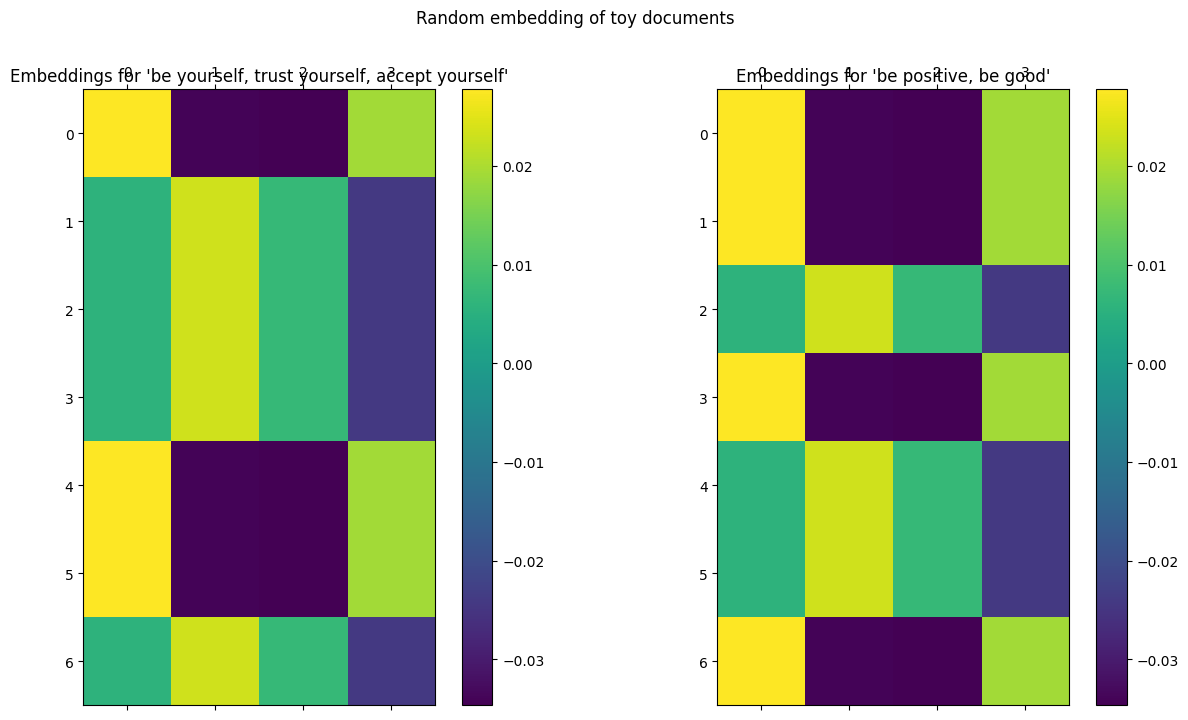

In [11]:
fig = plt.figure(figsize=(15,8))
ax = plt.subplot(1,2,1)
cax = ax.matshow(toy_embedded_words.numpy()[0])
plt.gcf().colorbar(cax)
plt.title('Embeddings for \'be yourself, trust yourself, accept yourself\'', y=1)
ax = plt.subplot(1,2,2)
cax = ax.matshow(toy_embedded_words.numpy()[1])
plt.gcf().colorbar(cax)
plt.title('Embeddings for \'be positive, be good\'', y=1)
fig.suptitle('Random embedding of toy documents')
plt.show()

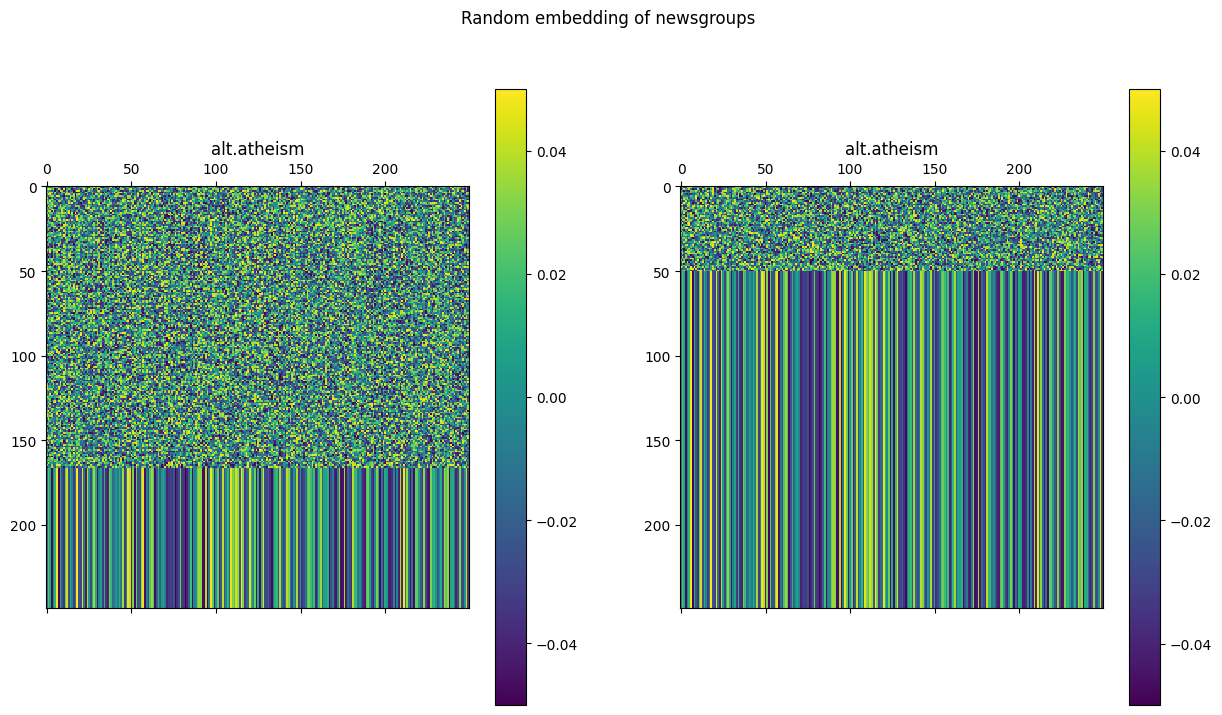

In [12]:
docs_embedding_layer = Embedding(input_dim=docs_vocab_size+1, output_dim=docs_output_seq_len)
docs_embedded_corpus = docs_embedding_layer(docs_vectorized_corpus[21:23])
fig = plt.figure(figsize=(15,8))
ax = plt.subplot(1,2,1)
cax = ax.matshow(docs_embedded_corpus.numpy()[0])
plt.gcf().colorbar(cax)
plt.title(newsgroup_names[train_Y[21]])
ax = plt.subplot(1,2,2)
cax = ax.matshow(docs_embedded_corpus.numpy()[1])
plt.gcf().colorbar(cax)
plt.title(newsgroup_names[train_Y[22]])
fig.suptitle('Random embedding of newsgroups')
plt.show()

In [21]:
class MyEmbeddingLayer(Layer):
  def __init__(self, seq_len, vocab_size, output_dim, n=10000, **kwargs):
    super(MyEmbeddingLayer, self).__init__(**kwargs)

    embedding_matrix_words = self.get_encoding_matrix(vocab_size, output_dim, n)
    self.embedding_layer_words = Embedding(input_dim=vocab_size, output_dim=output_dim, weights=[embedding_matrix_words], trainable=False)
    embedding_indices = self.get_encoding_matrix(seq_len, output_dim, n)
    self.embedding_indices = convert_to_tensor(embedding_indices, dtype=float32)

  def get_encoding_matrix(self, L, d, n):
    encoding_matrix = np.zeros((L,d))
    for i in range(L):
      for j in np.arange(int(d/2)):
        denom = np.power(n, 2*j/d)
        encoding_matrix[i, 2*j] = np.sin(i/denom)
        encoding_matrix[i, 2*j+1] = np.cos(i/denom)
    return encoding_matrix

  def call(self, inputs):
    embedded_words = self.embedding_layer_words(inputs)
    return embedded_words + self.embedding_indices

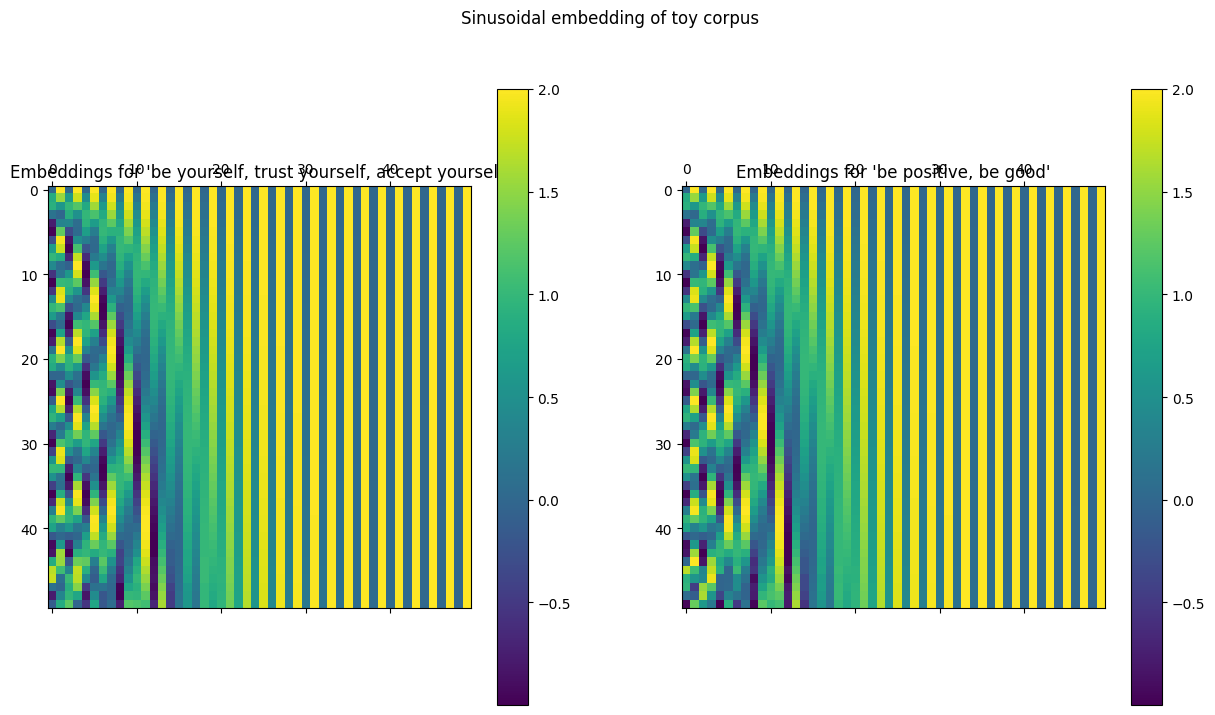

In [22]:
toy_vectors2 = pad_sequences(toy_vectorized_corpus, maxlen=50)
toy_embeddings_layer = MyEmbeddingLayer(seq_len=50, vocab_size=8, output_dim=50)
toy_sinusoid_embeddings = toy_embeddings_layer(toy_vectors2)

fig = plt.figure(figsize=(15,8))
ax = plt.subplot(1,2,1)
cax = ax.matshow(toy_sinusoid_embeddings.numpy()[0])
plt.gcf().colorbar(cax)
plt.title('Embeddings for \'be yourself, trust yourself, accept yourself\'', y=1)
ax = plt.subplot(1,2,2)
cax = ax.matshow(toy_sinusoid_embeddings.numpy()[1])
plt.gcf().colorbar(cax)
plt.title('Embeddings for \'be positive, be good\'', y=1)
fig.suptitle('Sinusoidal embedding of toy corpus')
plt.show()

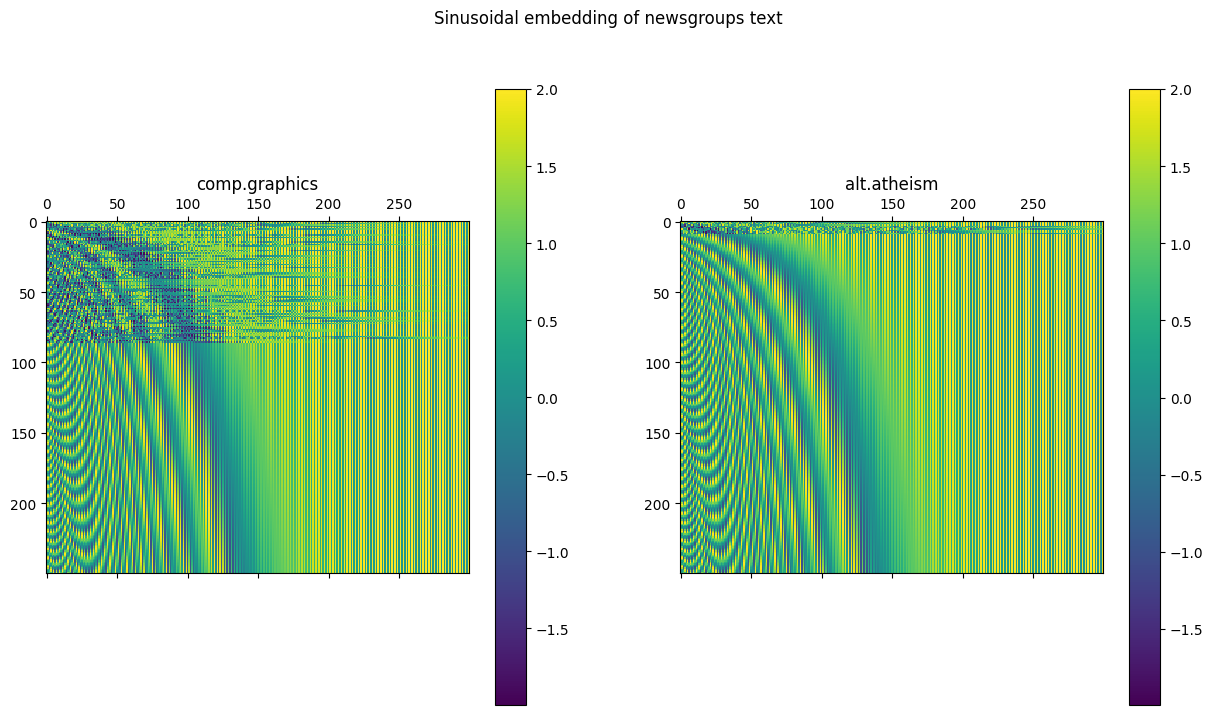

In [23]:
docs_embedding_layer = MyEmbeddingLayer(seq_len=docs_output_seq_len, vocab_size=docs_vocab_size, output_dim=300)
docs_sinusoid_words = docs_embedding_layer(docs_vectorized_corpus[40:42])
fig = plt.figure(figsize=(15,8))
ax = plt.subplot(1,2,1)
cax = ax.matshow(docs_sinusoid_words.numpy()[0])
plt.gcf().colorbar(cax)
plt.title(newsgroup_names[train_Y[40]])
ax = plt.subplot(1,2,2)
cax = ax.matshow(docs_sinusoid_words.numpy()[1])
plt.gcf().colorbar(cax)
plt.title(newsgroup_names[train_Y[41]])
fig.suptitle('Sinusoidal embedding of newsgroups text')
plt.show()

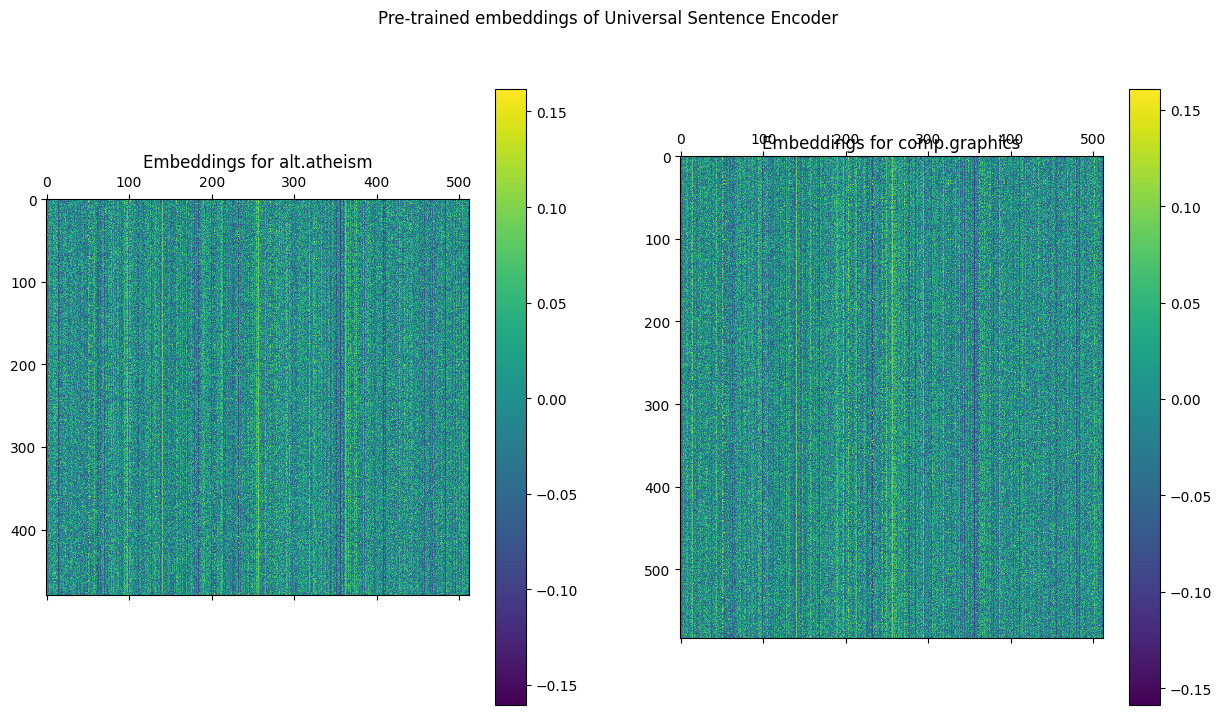

In [26]:
hub_sentence_encodings = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4')
ind_atheism = np.where(train_Y == 0)[0]
alt_atheism = list(map(train_X.__getitem__, np.where(train_Y==0)[0]))
ind_graphics = np.where(train_Y == 1)[0]
comp_graphics = list(map(train_X.__getitem__, ind_graphics))
embeddings_graphics = hub_sentence_encodings(constant(comp_graphics))
embeddings_atheism = hub_sentence_encodings(constant(alt_atheism))
fig = plt.figure(figsize=(15,8))
ax = plt.subplot(1,2,1)
cax = ax.matshow(embeddings_atheism.numpy())
plt.gcf().colorbar(cax)
plt.title("Embeddings for alt.atheism")

ax = plt.subplot(1,2,2)
cax = ax.matshow(embeddings_graphics.numpy())
plt.gcf().colorbar(cax)
plt.title("Embeddings for comp.graphics", y=1)
fig.suptitle('Pre-trained embeddings of Universal Sentence Encoder')
plt.show()

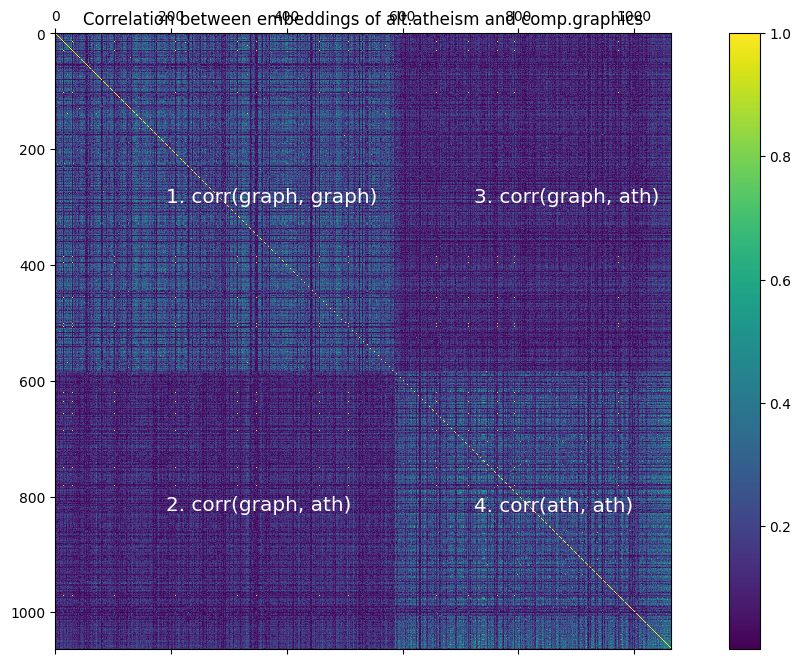

In [27]:
ath_len = embeddings_atheism.numpy().shape[0]
graph_len = embeddings_graphics.numpy().shape[0]
sim = np.absolute(np.corrcoef(x=embeddings_graphics, y=embeddings_atheism))

fig = plt.figure(figsize=(15,8))
cax = plt.gca().matshow(sim)
plt.gcf().colorbar(cax)
plt.title('Correlation between embeddings of alt.atheism and comp.graphics', y=1)
x1 = graph_len/2
x2 = graph_len+ath_len/2

_ = plt.text(x1-100, x1, '1. corr(graph, graph)', color='white', fontsize='x-large')
_ = plt.text(x1-100, x2, '2. corr(graph, ath)', color='white', fontsize='x-large')
_ = plt.text(x2-100, x1, '3. corr(graph, ath)', color='white', fontsize='x-large')
_ = plt.text(x2-100, x2, '4. corr(ath, ath)', color='white', fontsize='x-large')